In [1]:
import h5py as h5

import os 
import numpy as np 
import nbodykit.lab as NBlab
from astropy.utils.misc import NumpyRNGContext
from nbodykit.hod import Zheng07Model, HODModel



In [2]:
params = {'flat': True, 'H0': 67.11, 'Om0': 0.3175, 'Ob0': 0.049, 'sigma8': 0.834, 'ns': 0.9624}
cosmo_nb = NBlab.cosmology.Planck15.clone(
            h=params['H0']/100., 
            Omega0_b=params['Ob0'], 
            Omega0_cdm=params['Om0']-params['Ob0'],
            n_s=params['ns']) 

Lbox = 1000.0
p_hod = {
        'logMmin': 13.03, 
        'sigma_logM':0.38,
        'logM0': 13.27, 
        'logM1': 14.08, 
        'alpha': 0.76
        }


In [6]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'
df_truth_vox = h5.File(os.path.join(ldir, 'BDIFF_test_halos_truth_vox_Nmax5_sim_0.hdf5'), 'r')
group_data = {}  
group_data['Position']  = df_truth_vox['pos_h'][:]

df_nbkit = {}
df_nbkit['Position'] = df_truth_vox['pos_h'][:]
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_truth_vox_halos = r.power


group_data['Velocity']  = 0.0*df_truth_vox['pos_h'][:]
group_data['Mass']      = 10**df_truth_vox['lgMass'][:]
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_truth_vox = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_truth_vox
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_truth = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_truth, mode='1d', dk=0.01)
Pk_truth_vox = r.power




# df_mock_vox = h5.File(os.path.join(ldir, 'test_halos_mock_vox_Nmax5.hdf5'), 'r')
# df_truth = 


/tmp/ipykernel_250451/2253819574.py:11: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_250451/2253819574.py:29: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_truth = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


In [7]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'
df_mock_vox = h5.File(os.path.join(ldir, 'BDIFF_test_halos_mock_vox_Nmax5_sim_0.hdf5'), 'r')
group_data = {}  
group_data['Position']  = df_mock_vox['pos_h'][:]

df_nbkit = {}
df_nbkit['Position'] = df_mock_vox['pos_h'][:]
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_mock_vox_halos = r.power

group_data['Velocity']  = 0.0*df_mock_vox['pos_h'][:]
group_data['Mass']      = 10**df_mock_vox['lgMass'][:]
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_mock_vox = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_mock_vox
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_mock = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_mock, mode='1d', dk=0.01)
Pk_mock_vox = r.power


/tmp/ipykernel_250451/3633845525.py:11: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_250451/3633845525.py:28: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_mock = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


In [8]:
saved_j = {}
BoxSize = 1000.0 #Size of the density field in Mpc/h
threads = 1
theta   = np.linspace(0, np.pi, 16) #array with the angles between k1 and k2
saved_j['theta'] = theta

k1 = 0.03
k2 = 0.03
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p03  = BBk.B     #bispectrum
Qk_truth_k0p03  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p03  = BBk.B     #bispectrum
Qk_mock_k0p03  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p03'] = Bk_truth_k0p03
saved_j['Qk_truth_k0p03'] = Qk_truth_k0p03
saved_j['Bk_mock_k0p03'] = Bk_mock_k0p03
saved_j['Qk_mock_k0p03'] = Qk_mock_k0p03


k1 = 0.06
k2 = 0.06
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p06  = BBk.B     #bispectrum
Qk_truth_k0p06  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p06  = BBk.B     #bispectrum
Qk_mock_k0p06  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p06'] = Bk_truth_k0p06
saved_j['Qk_truth_k0p06'] = Qk_truth_k0p06
saved_j['Bk_mock_k0p06'] = Bk_mock_k0p06
saved_j['Qk_mock_k0p06'] = Qk_mock_k0p06

k1 = 0.1
k2 = 0.1
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p1  = BBk.B     #bispectrum
Qk_truth_k0p1  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p1  = BBk.B     #bispectrum
Qk_mock_k0p1  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p1'] = Bk_truth_k0p1
saved_j['Qk_truth_k0p1'] = Qk_truth_k0p1
saved_j['Bk_mock_k0p1'] = Bk_mock_k0p1
saved_j['Qk_mock_k0p1'] = Qk_mock_k0p1


k1 = 0.2
k2 = 0.2
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p2  = BBk.B     #bispectrum
Qk_truth_k0p2  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p2  = BBk.B     #bispectrum
Qk_mock_k0p2  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p2'] = Bk_truth_k0p2
saved_j['Qk_truth_k0p2'] = Qk_truth_k0p2
saved_j['Bk_mock_k0p2'] = Bk_mock_k0p2
saved_j['Qk_mock_k0p2'] = Qk_mock_k0p2


k1 = 0.3
k2 = 0.3
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p3  = BBk.B     #bispectrum
Qk_truth_k0p3  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p3  = BBk.B     #bispectrum
Qk_mock_k0p3  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p3'] = Bk_truth_k0p3
saved_j['Qk_truth_k0p3'] = Qk_truth_k0p3
saved_j['Bk_mock_k0p3'] = Bk_mock_k0p3
saved_j['Qk_mock_k0p3'] = Qk_mock_k0p3

k1 = 0.6
k2 = 0.6
BBk = PKL.Bk(mesh_truth, BoxSize, k1, k2, theta, None, threads)
Bk_truth_k0p6  = BBk.B     #bispectrum
Qk_truth_k0p6  = BBk.Q     #reduced bispectrum
BBk = PKL.Bk(mesh_mock, BoxSize, k1, k2, theta, None, threads)
Bk_mock_k0p6  = BBk.B     #bispectrum
Qk_mock_k0p6  = BBk.Q     #reduced bispectrum

saved_j['Bk_truth_k0p6'] = Bk_truth_k0p6
saved_j['Qk_truth_k0p6'] = Qk_truth_k0p6
saved_j['Bk_mock_k0p6'] = Bk_mock_k0p6
saved_j['Qk_mock_k0p6'] = Qk_mock_k0p6

# saved_Pk_Bk[j] = saved_j




NameError: name 'PKL' is not defined

In [5]:
ji = 5
snapnum = 4
snap_dir_base = '/mnt/home/spandey/ceph/Quijote/fiducial_HR_new/Halos/Rockstar'
snapdir = snap_dir_base + '/' + str(ji)  #folder hosting the catalogue
rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
    lines = f.readlines()
header = lines[0].split()
# get the properties of the halos
pos_h_truth = rockstar[:,header.index('X'):header.index('Z')+1]
index_M = header.index('M200c')                    
mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h
group_data = {}  
group_data['Position']  = pos_h_truth


df_nbkit = {}
df_nbkit['Position'] = pos_h_truth
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_truth_halos = r.power

group_data['Velocity']  = 0.0*pos_h_truth
group_data['Mass']      = mass_truth
cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
hod_test = hod.view()
gal_pos_truth = hod_test['Position'].compute()

df_nbkit = {}
df_nbkit['Position'] = gal_pos_truth
from nbodykit.source.catalog import ArrayCatalog
cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
ns_h = 256
mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
Pk_truth = r.power




/tmp/ipykernel_250451/1353118697.py:22: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_250451/1353118697.py:39: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')


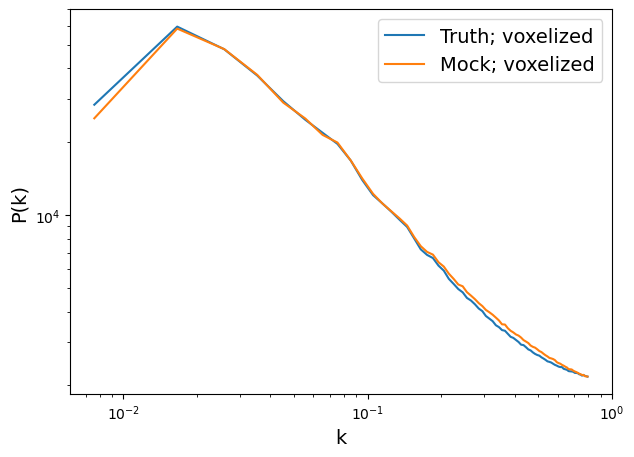

In [8]:
# import matplotlib.pyplot as pl
# pl.figure(figsize=(7,5))
# # pl.plot(Pk_truth_halos['k'], Pk_truth_halos['power'].real, label='Truth')
# pl.plot(Pk_truth_vox_halos['k'], Pk_truth_vox_halos['power'].real, label='Truth; voxelized')
# pl.plot(Pk_mock_vox_halos['k'], Pk_mock_vox_halos['power'].real, label='Mock; voxelized')
# # pl.plot(k_mockxtruth_chirag, Pk_mockxtruth_chirag, label='mockxtruth_chirag')
# pl.legend(fontsize=14)
# pl.xlabel('k', size=14)
# pl.ylabel('P(k)', size=14)
# pl.xscale('log')
# pl.yscale('log')



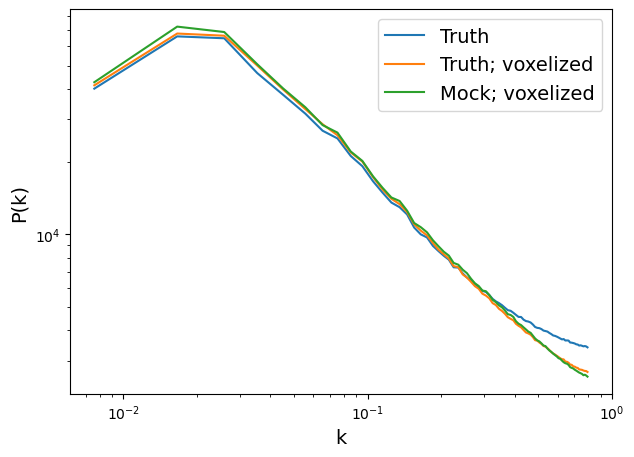

In [8]:
import matplotlib.pyplot as pl
pl.figure(figsize=(7,5))
pl.plot(Pk_truth['k'], Pk_truth['power'].real, label='Truth')
pl.plot(Pk_truth_vox['k'], Pk_truth_vox['power'].real, label='Truth; voxelized')
pl.plot(Pk_mock_vox['k'], Pk_mock_vox['power'].real, label='Mock; voxelized')
# pl.plot(k_mockxtruth_chirag, Pk_mockxtruth_chirag, label='mockxtruth_chirag')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.xscale('log')
pl.yscale('log')




(0.9, 1.1)

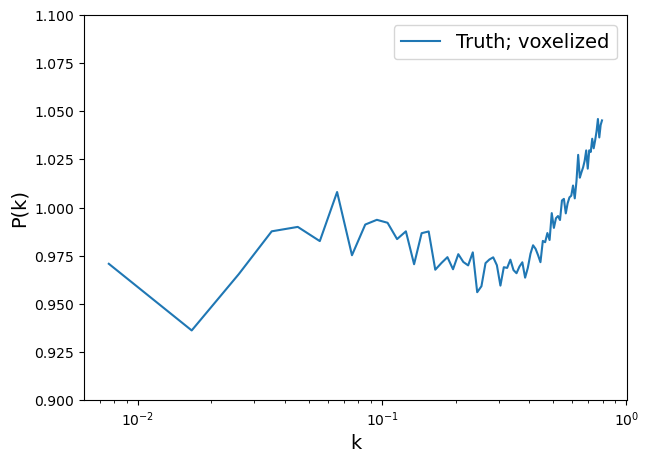

In [14]:
import matplotlib.pyplot as pl
pl.figure(figsize=(7,5))
# pl.plot(Pk_truth['k'], Pk_truth['power'].real, label='Truth')
# pl.plot(Pk_truth_vox['k'], Pk_truth['power'].real/Pk_mock_vox['power'].real, label='Truth; voxelized')
pl.plot(Pk_truth_vox['k'], Pk_truth_vox['power'].real/Pk_mock_vox['power'].real, label='Truth; voxelized')
# pl.plot(Pk_truth_vox['k'], Pk_truth_vox['power'].real/Pk_truth['power'].real, label='Truth; voxelized')
# pl.plot(Pk_mock_vox['k'], Pk_mock_vox['power'].real, label='Mock; voxelized')
# pl.plot(k_mockxtruth_chirag, Pk_mockxtruth_chirag, label='mockxtruth_chirag')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.xscale('log')
pl.ylim(0.9, 1.1)
# pl.yscale('log')




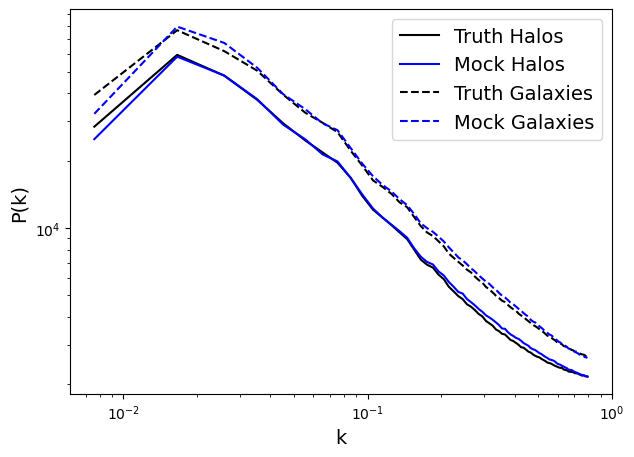

In [10]:
import matplotlib.pyplot as pl
pl.figure(figsize=(7,5))
# pl.plot(Pk_truth_halos['k'], Pk_truth_halos['power'].real, label='Truth')
pl.plot(Pk_truth_vox_halos['k'], Pk_truth_vox_halos['power'].real, label='Truth Halos', color='k', ls = '-')
pl.plot(Pk_mock_vox_halos['k'], Pk_mock_vox_halos['power'].real, label='Mock Halos', color='b', ls = '-')

pl.plot(Pk_truth_vox_halos['k'], Pk_truth_vox['power'].real, label='Truth Galaxies', color='k', ls = '--')
pl.plot(Pk_mock_vox_halos['k'], Pk_mock_vox['power'].real, label='Mock Galaxies', color='b', ls = '--')

# pl.plot(k_mockxtruth_chirag, Pk_mockxtruth_chirag, label='mockxtruth_chirag')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.xscale('log')
pl.yscale('log')


In [7]:
ldir = '/mnt/home/spandey/ceph/AR_NPE/test_data/'

nsims = 4
Pk_truth_vox_all_sim = []
Pk_mock_vox_all_sim = []
Pk_truth_all_sim = []

Pk_truth_vox_all_sim_halos = []
Pk_mock_vox_all_sim_halos = []
Pk_truth_all_sim_halos = []

Pk_truth_mock_vox_all_sim = []

for ji in range(nsims):

    df_truth_vox = h5.File(os.path.join(ldir, 'BDIFF_test_halos_truth_vox_Nmax5_sim_' + str(ji) + '.hdf5'), 'r')
    group_data = {}  
    group_data['Position']  = df_truth_vox['pos_h'][:]

    df_nbkit = {}
    df_nbkit['Position'] = df_truth_vox['pos_h'][:]
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth_vox_halos = r.power
    Pk_truth_vox_all_sim_halos.append(Pk_truth_vox_halos['power'].real)


    group_data['Velocity']  = 0.0*df_truth_vox['pos_h'][:]
    group_data['Mass']      = 10**df_truth_vox['lgMass'][:]
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_truth_vox = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_truth_vox
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth_vox = r.power
    Pk_truth_vox_all_sim.append(Pk_truth_vox['power'].real)


    df_mock_vox = h5.File(os.path.join(ldir, 'BDIFF_test_halos_mock_vox_Nmax5_sim_' + str(ji) + '.hdf5'), 'r')
    group_data = {}  
    group_data['Position']  = df_mock_vox['pos_h'][:]

    df_nbkit = {}
    df_nbkit['Position'] = df_mock_vox['pos_h'][:]
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_mock_vox_halos = r.power
    Pk_mock_vox_all_sim_halos.append(Pk_mock_vox_halos['power'].real)


    group_data['Velocity']  = 0.0*df_mock_vox['pos_h'][:]
    group_data['Mass']      = 10**df_mock_vox['lgMass'][:]
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_mock_vox = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_mock_vox
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_mock_vox = r.power
    Pk_mock_vox_all_sim.append(Pk_mock_vox['power'].real)


    Pk_truth_mock_vox_all_sim.append(Pk_truth_vox['power'].real/Pk_mock_vox['power'].real)

    jsim = ji + 5
    snapnum = 4
    snap_dir_base = '/mnt/home/spandey/ceph/Quijote/fiducial_HR_new/Halos/Rockstar'
    snapdir = snap_dir_base + '/' + str(jsim)  #folder hosting the catalogue
    rockstar = np.loadtxt(snapdir + '/out_' + str(snapnum) + '_pid.list')
    with open(snapdir + '/out_' + str(snapnum) + '_pid.list', 'r') as f:
        lines = f.readlines()
    header = lines[0].split()
    # get the properties of the halos
    pos_h_truth = rockstar[:,header.index('X'):header.index('Z')+1]
    index_M = header.index('M200c')                    
    mass_truth = rockstar[:,index_M]  #Halo masses in Msun/h
    group_data = {}  
    group_data['Position']  = pos_h_truth

    df_nbkit = {}
    df_nbkit['Position'] = pos_h_truth
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth_halos = r.power
    Pk_truth_all_sim_halos.append(Pk_truth_halos['power'].real)

    group_data['Velocity']  = 0.0*pos_h_truth
    group_data['Mass']      = mass_truth
    cat = NBlab.ArrayCatalog(group_data, BoxSize=np.array([Lbox, Lbox, Lbox]))
    halos = NBlab.HaloCatalog(cat, cosmo=cosmo_nb, redshift=0.0, mdef='vir')     
    hod = halos.populate(Zheng07Model, seed=0, **p_hod) 
    hod_test = hod.view()
    gal_pos_truth = hod_test['Position'].compute()

    df_nbkit = {}
    df_nbkit['Position'] = gal_pos_truth
    from nbodykit.source.catalog import ArrayCatalog
    cat = ArrayCatalog(df_nbkit, BoxSize=1000.0)
    ns_h = 256
    mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
    r = NBlab.FFTPower(mesh_orig, mode='1d', dk=0.01)
    Pk_truth = r.power
    Pk_truth_all_sim.append(Pk_truth['power'].real)







/tmp/ipykernel_466071/3169928344.py:25: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_466071/3169928344.py:44: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_466071/3169928344.py:59: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_466071/3169928344.py:78: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = cat.to_mesh(window='nearest', Nmesh=ns_h, compensated=False, position='Position')
/tmp/ipykernel_466071/3169928344.py:106: DeprecationWarning: The window argument is deprecated. Use `resampler=` instead
  mesh_orig = c

In [8]:
Pk_truth_vox_all_sim = np.array(Pk_truth_vox_all_sim)
Pk_mock_vox_all_sim = np.array(Pk_mock_vox_all_sim)
Pk_truth_all_sim = np.array(Pk_truth_all_sim)
Pk_truth_mock_vox_all_sim = np.array(Pk_truth_mock_vox_all_sim)

Pk_truth_vox_all_sim_halos = np.array(Pk_truth_vox_all_sim_halos)
Pk_mock_vox_all_sim_halos = np.array(Pk_mock_vox_all_sim_halos)
Pk_truth_all_sim_halos = np.array(Pk_truth_all_sim_halos)





Text(0.5, 1.0, 'Galaxies, 4Mpc/h resolution')

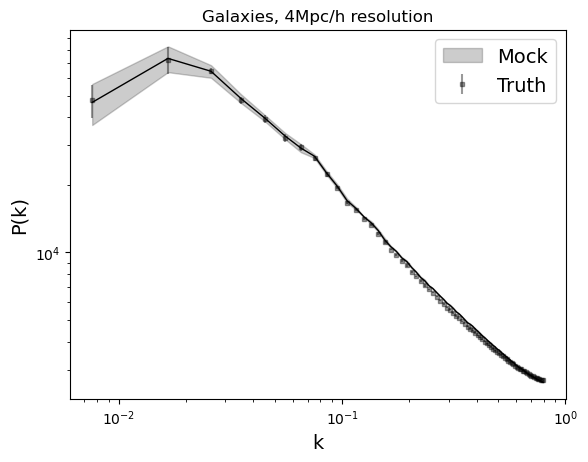

In [5]:
import matplotlib.pyplot as pl
pl.figure()
pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0), yerr=(np.std(Pk_truth_vox_all_sim, axis=0)), color='k', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0), lw=1.0, color='k')
pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0) - np.std(Pk_mock_vox_all_sim, axis=0), np.mean(Pk_mock_vox_all_sim, axis=0) + np.std(Pk_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_all_sim, axis=0), yerr=np.std(Pk_truth_all_sim, axis=0), label='Truth')
pl.xscale('log')
pl.yscale('log')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.title('Galaxies, 4Mpc/h resolution')




Text(0.5, 1.0, 'Halos and Galaxies, 4Mpc/h resolution')

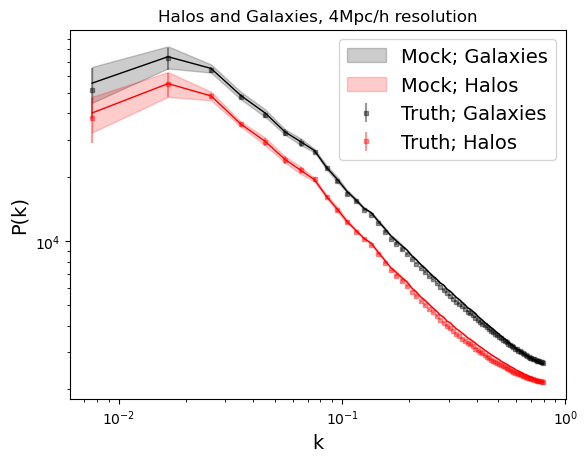

In [13]:
import matplotlib.pyplot as pl
pl.figure()
pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0), yerr=(np.std(Pk_truth_vox_all_sim, axis=0)), color='k', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth; Galaxies')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0), lw=1.0, color='k')
pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim, axis=0) - np.std(Pk_mock_vox_all_sim, axis=0), np.mean(Pk_mock_vox_all_sim, axis=0) + np.std(Pk_mock_vox_all_sim, axis=0), label='Mock; Galaxies', color='k', alpha=0.2)


pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim_halos, axis=0), yerr=(np.std(Pk_truth_vox_all_sim_halos, axis=0)), color='r', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth; Halos')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim_halos, axis=0), lw=1.0, color='r')
pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_mock_vox_all_sim_halos, axis=0) - np.std(Pk_mock_vox_all_sim_halos, axis=0), np.mean(Pk_mock_vox_all_sim_halos, axis=0) + np.std(Pk_mock_vox_all_sim_halos, axis=0), label='Mock; Halos', color='r', alpha=0.2)


pl.xscale('log')
pl.yscale('log')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k)', size=14)
pl.title('Halos and Galaxies, 4Mpc/h resolution')





Text(0.5, 1.0, 'Galaxies, 4Mpc/h resolution')

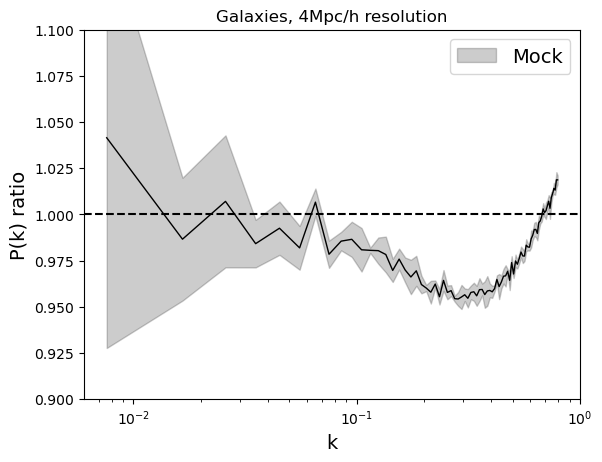

In [10]:
import matplotlib.pyplot as pl
pl.figure()
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0), yerr=(np.std(Pk_truth_vox_all_sim, axis=0)), color='k', ls='', ms=3.0, marker='s', alpha=0.4, label='Truth')
# pl.plot(Pk_mock_vox['k'], np.mean(Pk_truth_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), lw=1.0, color='k')
pl.plot(Pk_mock_vox['k'], np.mean(Pk_truth_mock_vox_all_sim, axis=0), lw=1.0, color='k')
pl.fill_between(Pk_mock_vox['k'], np.mean(Pk_truth_mock_vox_all_sim, axis=0) - np.std(Pk_truth_mock_vox_all_sim, axis=0), np.mean(Pk_truth_mock_vox_all_sim, axis=0) + np.std(Pk_truth_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
# pl.fill_between(Pk_mock_vox['k'], 1- np.std(Pk_mock_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), 1+ np.std(Pk_mock_vox_all_sim, axis=0)/np.mean(Pk_mock_vox_all_sim, axis=0), label='Mock', color='k', alpha=0.2)
# pl.errorbar(Pk_truth_vox['k'], np.mean(Pk_truth_all_sim, axis=0), yerr=np.std(Pk_truth_all_sim, axis=0), label='Truth')
pl.xscale('log')
pl.axhline(1.0, ls='--', color='k')
# pl.yscale('log')
pl.legend(fontsize=14)
pl.xlabel('k', size=14)
pl.ylabel('P(k) ratio', size=14)
pl.ylim(0.9, 1.1)
pl.title('Galaxies, 4Mpc/h resolution')




In [19]:
np.sqrt(np.std(Pk_truth_vox_all_sim, axis=0))


array([117.55030253,  92.92416237,  46.45836683,  35.9171184 ,
        36.10155715,  33.9242577 ,  34.19087307,  24.79452209,
        21.59661474,  20.36301993,  18.81009211,  14.13435271,
        13.83890371,   9.5195996 ,  11.28680876,  12.40220832,
         6.92720031,  12.54650058,  11.38586818,   9.7714343 ,
         7.46291934,   7.28645809,   7.38963658,   9.57818983,
         7.46417363,   7.13761621,   7.26827681,   3.82591226,
         6.41961967,   4.85093575,   5.0174447 ,   5.18930524,
         4.90944509,   4.35149355,   7.0542115 ,   4.19781823,
         3.41358136,   4.9558363 ,   5.24415415,   4.46542674,
         3.54676648,   4.41792253,   4.44923511,   4.03747513,
         3.67476638,   3.40232224,   5.23617605,   3.3723728 ,
         3.62051632,   2.85951101,   2.81999665,   2.89756759,
         4.11573552,   4.09741172,   3.87439987,   3.91043799,
         3.13146033,   2.22491125,   3.2675484 ,   3.46339828,
         2.84659754,   3.14378348,   2.7491229 ,   2.67